<a href="https://colab.research.google.com/github/zubaidak/Summer-Microcredential-Data-Analytics-/blob/main/Titanic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem

The aim for this analysis is to project the classification of survived vs. not-survived in the Titanic

# Task 2: Load the Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly               # graphing library 
import cufflinks as cf

cf.go_offline()             #we not using plotly for profit


# Task 3: Load the Data

In [20]:
train = pd.read_csv('https://raw.githubusercontent.com/zubaidak/ML-data/main/titanic_train.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train.isnull()
# shows the empty values in our data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
train.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64

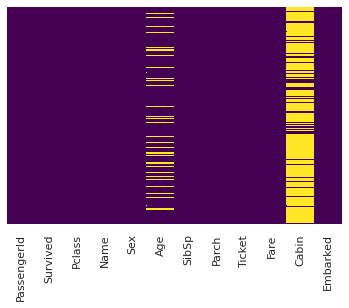

In [26]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# cmap is color pallette from seaborn

As we can see, roughly 20% of the age data is missing. Therefore, the proportion of Age missing is likely small enough for reasonable replacement with some form of inputation. If we look at the Cabin column, we can see that we are missing too much data to progress further.

# Task 5: Data Visualization

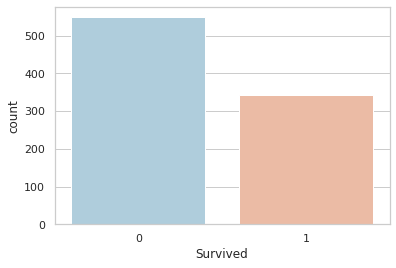

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

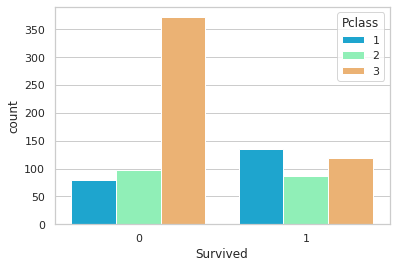

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

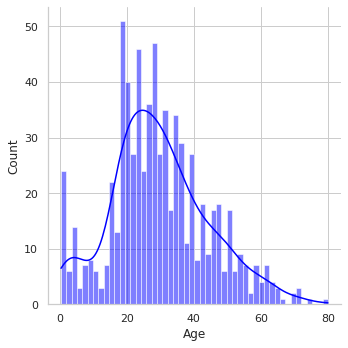

In [29]:
sns.displot(train['Age'].dropna(), kde=True, color='blue', bins=50)

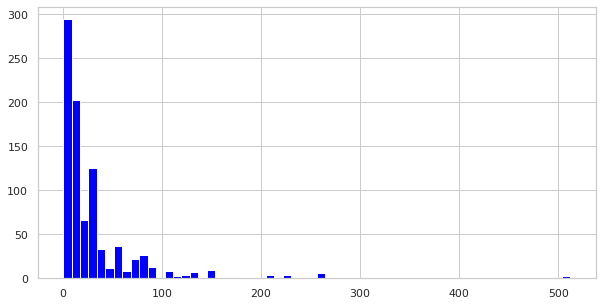

In [30]:
train['Fare'].hist(color='blue', bins=60, figsize=(10,5))

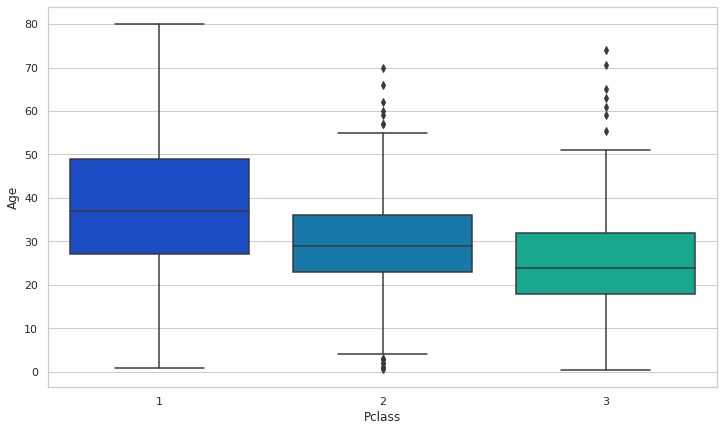

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

Since we can deterimine that people in higher classes tend to be older we can then use these to average 

# Task 6: Compute the cost Function

# Task 7: Compute the Gradient Descent

# Task 8: Visualizing the Cost Function

# Task 9: Conduct the Linear Regression on the Data

# Task 10: Making Predictions